# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

I chose to analyze the no show appointments data to determine whether or not patients show up to their appointments. The following are questions I plan on exploring: Does one gender have a higher no-show rate than the other? Is diabetes a factor in determining whether or not patients show up? Does scholarship affect appointments?

In [140]:
#Import necessary packages

import csv
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline





<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [112]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('data/noshowappointments-kagglev2-may-2016.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The following steps aim to clean the data. 

In [134]:
# Determine if there are any duplicates
sum(df.duplicated())

0

In [114]:
# Extract date from AppointmentDay
date = df['AppointmentDay']
pd.to_datetime(date)

0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
5        2016-04-29
6        2016-04-29
7        2016-04-29
8        2016-04-29
9        2016-04-29
10       2016-04-29
11       2016-04-29
12       2016-04-29
13       2016-04-29
14       2016-04-29
15       2016-04-29
16       2016-04-29
17       2016-04-29
18       2016-04-29
19       2016-04-29
20       2016-04-29
21       2016-04-29
22       2016-04-29
23       2016-04-29
24       2016-04-29
25       2016-04-29
26       2016-04-29
27       2016-04-29
28       2016-04-29
29       2016-04-29
            ...    
110497   2016-06-01
110498   2016-06-08
110499   2016-06-01
110500   2016-06-08
110501   2016-06-01
110502   2016-06-08
110503   2016-06-01
110504   2016-06-08
110505   2016-06-01
110506   2016-06-01
110507   2016-06-08
110508   2016-06-01
110509   2016-06-08
110510   2016-06-01
110511   2016-06-08
110512   2016-06-08
110513   2016-06-08
110514   2016-06-08
110515   2016-06-08


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### What is the percentage of no-shows for all appointments?

In [115]:
# Determine "yes" and "no" totals for no-shows
df_appt = df['No-show'].value_counts()
df_appt




No     88208
Yes    22319
Name: No-show, dtype: int64

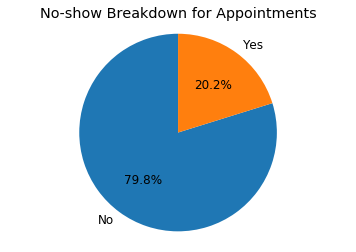

In [184]:
No = 88208
Yes = 22319

plt.rcParams.update({'font.size': 12})

plt.pie([No, Yes],
        labels=['No', 'Yes'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('No-show Breakdown for Appointments')

plt.axis('equal') 
plt.show()

79.8% of patients showed up to their appointments, while 20.2% did not.

In [117]:
df_noshowno =  df_appt[0]
df_noshowyes = df_appt[1]
df_noshowtotal = df_noshowno + df_noshowyes
df_noshowpercentage = float(df_noshowyes) / df_noshowtotal
df_noshowpercentage

0.20193255946510807

20.2% of total apppointments resulted in a no show, while 80.0% resultedin patients showing up.

### Is one gender more likely to show up to an appointment than the other?

In [135]:
# Determine number of appointments by gender.
df_gender = df['Gender'].value_counts()
df_gender



F    71840
M    38687
Name: Gender, dtype: int64

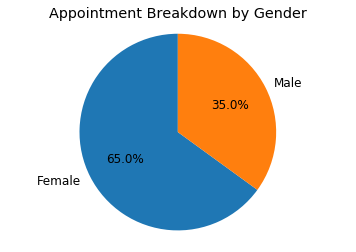

In [179]:
Female = 71840
Male = 38687

plt.rcParams.update({'font.size': 12})

plt.pie([Female,Male],
        labels=['Female', 'Male'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Appointment Breakdown by Gender')

plt.axis('equal') 
plt.show()

Women made up the majority of total appointments at 65.0%.

In [119]:
df.groupby(['Gender', 'No-show']).size()

Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
dtype: int64

In [120]:
df_femalenoshow = 14594 / df_gender[0]
df_femalenoshow

0.20314587973273943

Out of the total female appointments, 20.3% were no-shows.

In [121]:
df_malenoshow = 7725 / df_gender[1]
df_malenoshow

0.19967947889471915

The male no-show rate was 20.0%.

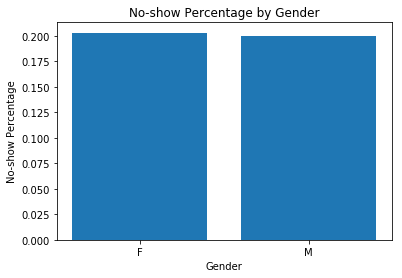

In [148]:
plt.bar(('F','M'), [df_femalenoshow,df_malenoshow])
plt.title('No-show Percentage by Gender')
plt.xlabel('Gender',)
plt.ylabel('No-show Percentage')
plt.show()

### What's the no-show breakdown for patients with and without Diabetes?

In [146]:
df_diabetes_count = df['Diabetes'].value_counts()
df_diabetes_count

0    102584
1      7943
Name: Diabetes, dtype: int64

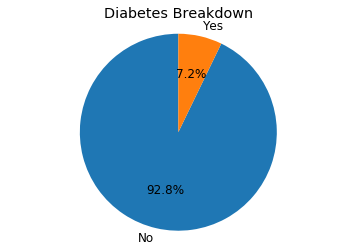

In [180]:
No = 102584
Yes = 7943

plt.rcParams.update({'font.size': 12})

plt.pie([No, Yes],
        labels=['No', 'Yes'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Diabetes Breakdown')

plt.axis('equal') dfdfdfdfdfdfdfdf
plt.show()

Only 7.2% of patients had diabetes.

In [185]:
df_diabetes = df['Diabetes']
df_noshow = df['No-show']
df_diabetes.groupby(df_noshow)


In [141]:
df.groupby(['Diabetes', 'No-show']).size()


Diabetes  No-show
0         No         81695
          Yes        20889
1         No          6513
          Yes         1430
dtype: int64

In [168]:
df_apptwithdiabetes= 1430 / df_diabetes_count[1]
df_apptwithdiabetes

0.18003273322422259

18.0% of patients with diabetes did not show up to their appointments.

In [169]:
df_apptwithoutdiabetes= 20889 / df_diabetes_count[0]
df_apptwithoutdiabetes

0.20362824612025268

### What's the percentage of appointments with scholarship?

In [136]:
# Determine number of appointments with and without scholarship. 0 indicates no scholarship. 1 indicates scholarship.
df_scholarship = df['Scholarship'].value_counts()
df_scholarship

0    99666
1    10861
Name: Scholarship, dtype: int64

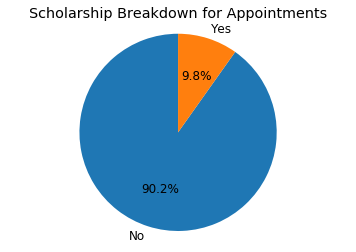

In [ ]:
No = 99666
Yes = 10861

plt.rcParams.update({'font.size': 12})

plt.pie([No, Yes],
        labels=['No', 'Yes'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Scholarship Breakdown for Appointments')

plt.axis('equal') 
plt.show()

Majority of appointments did not have a scholarship. Scholarship made up 9.8% of total appointments.

### Do patients with scholarship show up more than those who do not have scholarship?

In [132]:
df.groupby(['Scholarship', 'No-show']).size()

Scholarship  No-show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
dtype: int64

In [128]:
df_scholarshipnoshow = 2578 / df_scholarship[1]
df_scholarshipnoshow

0.23736304207715681

23.7% of scholarship appointments were no-shows.

In [129]:
df_sansscholarshipnoshow = 19741 / df_scholarship[0]
df_sansscholarshipnoshow

0.19807155900708365

19.8% of appointments without scholarship resulted in a no-show.

<a id='conclusions'></a>
## Conclusions

Note: The dataset only includes 2016 apppointments. The findings in this analysis do not include historical data or year-over-year trends. 

20.2% of total appointments resulted in a no-show, while 80.0% resulted in patients showing up. Based on these percentages, patients are highly
likely to show up to their appointments. 

20.3% of female appointments resulted in a no show, while 20.0% of male appointments were no-shows. Both male and female patients have the same no-show rates which means gender does not indicate likelihood of showing up to an appointment or not.

Only 7.2% of patients had diabetes. 18.0% of diabetes appointments resulted in a no-show, while 20.4% of appointments without diabetes resulted in a no-show. Diabetes appointments only have a slightly lower no-show rate. There is no clear indication that diabetes affects no-show rates.

9.8% of total appointments had scholarship. 23.7% of scholarship appointments resulted in a no-show, while 19.8% of appointments without scholarship were no-shows. There is no clear indication that scholarship affects whether or not patients show up.

In [186]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0